In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [185]:
mushroom_df = pd.read_csv('../csv-data/mushrooms.csv')
mushroom_df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [186]:
#for i in mushroom_df.columns:
#    print(i,mushroom_df[i].unique)

In [187]:
for i in mushroom_df.columns:
    mushroom_df[i] = LabelEncoder().fit_transform(mushroom_df[i])
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [210]:
col_list = [] 
col_list = mushroom_df.iloc[:,1:5].columns
print(col_list)
data = col_list 

def tts(num):
    X_train, X_test, y_train, y_test = train_test_split(
                            mushroom_df[data],
                            mushroom_df['class'], 
                            test_size = num,
                            #random_state = 42
                        )


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises'], dtype='object')


In [211]:
df_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC()

clf_list = [df_clf, rf_clf, svc_clf]

In [212]:

acc_list = []
acc = accuracy_score(y_test,pred)
def acc_pred():
    for clf in clf_list:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        #print(accuracy_score(y_test, pred))
        result=accuracy_score(y_test,pred)
        acc_list.append(result)
    return acc_list

In [213]:
acc_pred()

[0.8933552091878589, 0.8929450369155045, 0.8022969647251845]

In [214]:
max_index= np.argmax(acc_pred()) #가장큰 수의 인덱스 값 
max_index

0

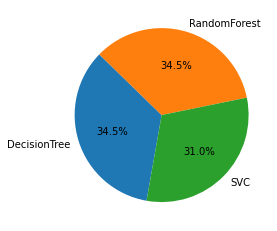

In [215]:
import matplotlib.pyplot as plt 

ratio = [0.893355,0.892945, 0.8022]
labels = ['DecisionTree','RandomForest','SVC']

plt.pie(ratio, labels=labels, autopct = '%.1f%%', startangle = 260, counterclock=False)
plt.show()


In [216]:
# def exec_kfold2(df, clf, k): 
#     acc_list2 = [] 
#     kfold = KFold(n_splits=k)
#     for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
#         X_train2, X_test2 = df[data].values[train_index], df['class'].values[test_index]
#         y_train2, y_test2 = df['class'].values[train_index], df['class'].values[test_index]
#         X_test2 = X_test2.reshape(-1,1)
#         #clf = clf.reshape(-1,1)
        
        
#         clf.fit(X_train2, y_train2)
#         clf = clf.reshape(-1,1)
#         pred2 = clf.predict(X_test2)
#         acc2 = accuracy_score(y_test2, pred2)
#         acc_list2.append(acc2)
#      #   print(i, ':교차검증 정확도>>{0:.2f}'.format(acc2))
#     #print('평균 정확도>>{0:.2f}'.format(np.mean(acc_list2)))
#     #acc_list2 = acc_list2.reshape(-1,1)
#     return np.mean(acc_list2)

In [193]:
#mushroom_df = mushroom_df.reshape(-1,1)

In [194]:
#exec_kfold2(mushroom_df,rf_clf, 10)

In [195]:
#mushroom_df2 = pd.get_dummies(mushroom_df)
#mushroom_df2

In [196]:
#del mushroom_df2['class_p']

In [197]:
#mushroom_df2

In [198]:
#col_list = [] 
#col_list = mushroom_df2.iloc[:,1:7].columns
#print(col_list)
#data = col_list 
#X_train, X_test, y_train, y_test = train_test_split(
#                        mushroom_df2[data],
#                        mushroom_df2['class_e'], 
#                        test_size = 0.3,
#                        random_state = 42
#                        )
#col_list = [] 
#col_list = list(df1.iloc[:,[0,2]].columns)
#col_list       

In [199]:
#X_train.shape

In [200]:
#y_train.shape

In [201]:
#X_test.shape

In [202]:
#y_test.shape

In [203]:
#df_clf = DecisionTreeClassifier(random_state=42)
#rf_clf = RandomForestClassifier(random_state=42)
#svc_clf = SVC()

#clf_list = [df_clf, rf_clf, svc_clf]

In [204]:
#for clf in clf_list:
#    clf.fit(X_train, y_train)
#    pred = clf.predict(X_test)
#    print(accuracy_score(y_test, pred))